In [ ]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt   

In [ ]:
df = pd.read_csv('FakeNews_and_Clickbait_Detection.csv')

In [ ]:
#1 means the news is fake and  means that the news is real
df.head()

,Unnamed: 0,id,title,author,text,label,clickbait
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,0


In [ ]:
df = df.dropna()

In [ ]:
X = df.drop('label', axis = 1)

In [ ]:
y = df['label']

In [ ]:
X.shape

(18285, 6)

In [ ]:
y.shape

(18285,)

In [ ]:
voc_size = 5000

In [ ]:
msg = X.copy()

In [ ]:
#reset the index to get the proper count
msg.reset_index(inplace = True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
corpus = []
for i in range(0, len(msg)):
   
    review = re.sub('[^a-zA-Z]', ' ', msg['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
len(corpus)

18285

In [ ]:
msg['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [ ]:
onehot_representation = [one_hot(words, voc_size) for words in corpus]

In [ ]:
sent_length = 20
embeded_docs = pad_sequences(onehot_representation, padding = "pre", maxlen = sent_length)

In [ ]:
embeded_docs[0]

array([ 653, 2509, 3023, 2108, 1765,  815, 4039, 1860, 2859, 3542, 4545,
       4941, 3362, 4257, 2509, 1869, 4236,  328, 1448, 3362], dtype=int32)

In [ ]:
#Building a model 
dimension = 40
model = Sequential()
model.add(Embedding(voc_size, dimension, input_length = sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_final = np.array(embeded_docs)

In [ ]:
y_final = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)

In [ ]:
#Training a model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 64)

Epoch 1/20
229/229 [==============================] - 14s 24ms/step - loss: 0.3998 - accuracy: 0.7995 - val_loss: 0.3234 - val_accuracy: 0.8594
Epoch 2/20
229/229 [==============================] - 4s 18ms/step - loss: 0.2425 - accuracy: 0.8992 - val_loss: 0.3243 - val_accuracy: 0.8559
Epoch 3/20
229/229 [==============================] - 4s 19ms/step - loss: 0.1811 - accuracy: 0.9303 - val_loss: 0.3885 - val_accuracy: 0.8532
Epoch 4/20
229/229 [==============================] - 4s 18ms/step - loss: 0.1333 - accuracy: 0.9498 - val_loss: 0.4501 - val_accuracy: 0.8496
Epoch 5/20
229/229 [==============================] - 4s 18ms/step - loss: 0.0955 - accuracy: 0.9661 - val_loss: 0.5388 - val_accuracy: 0.8417
Epoch 6/20
229/229 [==============================] - 4s 18ms/step - loss: 0.0724 - accuracy: 0.9752 - val_loss: 0.5935 - val_accuracy: 0.8370
Epoch 7/20
229/229 [==============================] - 5s 23ms/step - loss: 0.0492 - accuracy: 0.9828 - val_loss: 0.7313 - val_accuracy: 0.838

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[9.9943537e-01],
       [1.8594459e-09],
       [8.8086075e-12],
       ...,
       [9.9984550e-01],
       [9.9299192e-01],
       [1.0000000e+00]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)
cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)

[1.   0.   0.   ... 1.   0.99 1.  ]
[1 0 0 ... 1 1 1]
[[1735  347]
 [ 267 1308]]


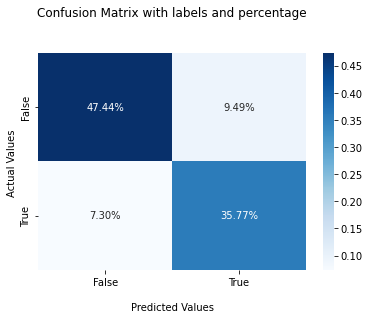

In [ ]:
import seaborn as sns
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix with labels and percentage\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2082
           1       0.79      0.83      0.81      1575

    accuracy                           0.83      3657
   macro avg       0.83      0.83      0.83      3657
weighted avg       0.83      0.83      0.83      3657



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8321028165162702


In [ ]:
model.save('fake_model.h5')